In [14]:
import pandas as pd
rawdata = pd.read_csv('./dataset/toutiao/DMSC.csv',low_memory=False)
rawdata = rawdata[rawdata['Movie_Name_CN']=='大圣归来']
rawdata = rawdata[['ID','Comment','Star']]
rawdata

,ID,Comment,Star
292854,292854,有人说挺《小时代》的人都将在电影史耻辱柱上有一席之地。那么给《大圣归来》的打一星的人也是如...,4
292855,292855,京剧+摇滚+大话西游配乐，孙猴如何解印、老师傅咋来悬空寺是败笔，但有气魄、胆识、干劲、瑕不...,4
292856,292856,四星。1.甩开《超能陆战队》这种屎片几百条大街。2.西游记新编，无论从故事创作还是动画特效...,4
292857,292857,实在不喜欢这种病毒式宣传方式，上映前一堆人在各大网站洗脑，电影怎么怎么好，哭成狗，官方没钱...,1
292858,292858,造型太杂（结尾大蠕虫甚至恶心和吓人），角色形象cos痕迹明显（《超能陆战队》反派、《大话西...,2
...,...,...,...
426242,426242,看预告感觉不错，有点期待，但愿别让人失望啊,4
426243,426243,有笑点，有泪点，足以,5
426244,426244,开头结尾都燃爆了，那披风特别帅，这种剧情设定比仅仅因为唐僧救了猴子，猴子就老老实实护他取经...,5
426245,426245,江流儿：大圣虐我千百遍，我待大圣如初恋。,2


In [15]:
rawdata = rawdata.drop_duplicates('ID',keep='first')
rawdata = rawdata.dropna()
rawdata['Star']=rawdata['Star'].astype(int)
rawdata

,ID,Comment,Star
292854,292854,有人说挺《小时代》的人都将在电影史耻辱柱上有一席之地。那么给《大圣归来》的打一星的人也是如...,4
292855,292855,京剧+摇滚+大话西游配乐，孙猴如何解印、老师傅咋来悬空寺是败笔，但有气魄、胆识、干劲、瑕不...,4
292856,292856,四星。1.甩开《超能陆战队》这种屎片几百条大街。2.西游记新编，无论从故事创作还是动画特效...,4
292857,292857,实在不喜欢这种病毒式宣传方式，上映前一堆人在各大网站洗脑，电影怎么怎么好，哭成狗，官方没钱...,1
292858,292858,造型太杂（结尾大蠕虫甚至恶心和吓人），角色形象cos痕迹明显（《超能陆战队》反派、《大话西...,2
...,...,...,...
426242,426242,看预告感觉不错，有点期待，但愿别让人失望啊,4
426243,426243,有笑点，有泪点，足以,5
426244,426244,开头结尾都燃爆了，那披风特别帅，这种剧情设定比仅仅因为唐僧救了猴子，猴子就老老实实护他取经...,5
426245,426245,江流儿：大圣虐我千百遍，我待大圣如初恋。,2


/home/linjw/anaconda3/envs/biobase/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


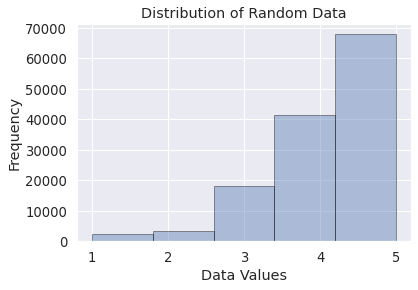

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
# 设置Seaborn样式和字体大小
sns.set_style('whitegrid')
sns.set(font_scale=1.2)

# 绘制数据分布图
sns.distplot(rawdata['Star'], kde=False, bins=5, hist_kws=dict(edgecolor='black', linewidth=1))

# 设置标题和坐标轴标签
plt.title('Distribution of Random Data')
plt.xlabel('Data Values')
plt.ylabel('Frequency')

# 显示图形
plt.show()

In [17]:
#文本切分函数，用来对中文文本分词，包括除去数字字母以及停用词，得到一个分词用空格隔开的字符串，便于下面向量化（因为这个CountVouterizer()是针对英文分词的，英文之间直接用空格隔开的）
import re
#加载停用词，停用词要是列表形式才能使用
import csv
import jieba
num_class=2
stopWord=list(pd.read_table('./dataset/toutiao/ChineseStopWords.txt',header=None,encoding='utf-8',quoting=csv.QUOTE_NONE)[0].values)
def cut_word(sent):
    line=re.sub(r'[a-zA-Z0-9]*','',sent)
    wordList=jieba.lcut(line,cut_all=False)
    return ' '.join([word for word in wordList if word not in stopWord and len(word)>1])#文本分词，并且用空格连接起来，便于下面向量化

In [18]:
cut_word('有人说挺《小时代》的人都将在电影史耻辱柱上有一席之地。那么给《大圣归来》的打一星的人也')
rawdata['CutWord']=rawdata['Comment'].apply(cut_word)
rawdata

,ID,Comment,Star,CutWord
292854,292854,有人说挺《小时代》的人都将在电影史耻辱柱上有一席之地。那么给《大圣归来》的打一星的人也是如...,4,有人 时代 电影史 耻辱柱 一席之地 大圣 归来 一星 此片 称不上 神作 一星 心理 阴暗...
292855,292855,京剧+摇滚+大话西游配乐，孙猴如何解印、老师傅咋来悬空寺是败笔，但有气魄、胆识、干劲、瑕不...,4,京剧 摇滚 大话西游 配乐 孙猴 解印 老师傅 悬空寺 败笔 气魄 胆识 干劲 遮瑜 大闹天...
292856,292856,四星。1.甩开《超能陆战队》这种屎片几百条大街。2.西游记新编，无论从故事创作还是动画特效...,4,四星 甩开 陆战队 这种 几百条 大街 西游记 新编 故事 创作 动画 特效 无懈可击 完全...
292857,292857,实在不喜欢这种病毒式宣传方式，上映前一堆人在各大网站洗脑，电影怎么怎么好，哭成狗，官方没钱...,1,实在 喜欢 这种 病毒 宣传 方式 上映 一堆 各大 网站 洗脑 电影 哭成 官方 宣传 可...
292858,292858,造型太杂（结尾大蠕虫甚至恶心和吓人），角色形象cos痕迹明显（《超能陆战队》反派、《大话西...,2,造型 太杂 结尾 蠕虫 恶心 吓人 角色 形象 痕迹 明显 陆战队 反派 大话西游 至尊宝 ...
...,...,...,...,...
426242,426242,看预告感觉不错，有点期待，但愿别让人失望啊,4,预告 感觉 不错 有点 期待 失望
426243,426243,有笑点，有泪点，足以,5,有泪点 足以
426244,426244,开头结尾都燃爆了，那披风特别帅，这种剧情设定比仅仅因为唐僧救了猴子，猴子就老老实实护他取经...,5,开头 结尾 燃爆 披风 特别 这种 剧情 设定 仅仅 唐僧 猴子 猴子 取经 说服力
426245,426245,江流儿：大圣虐我千百遍，我待大圣如初恋。,2,江流 大圣 千百遍 我待 大圣 初恋


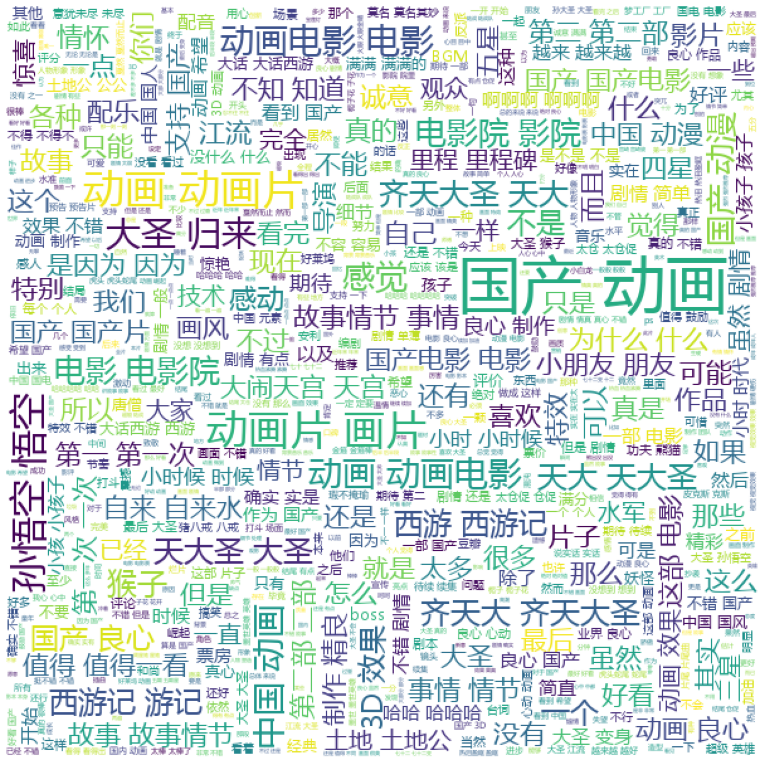

In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba
text = rawdata.Comment.sum()
#结巴分词
wordlist = jieba.cut(text,cut_all=True)
wordlist=[x for x in wordlist if len(x)>=2]
wl = " ".join(wordlist)
wc = WordCloud(background_color = "white", #设置背景颜色
               #mask = "图片",  #设置背景图片
               max_words = 2000, #设置最大显示的字数
               #stopwords = "", #设置停用词
               font_path='./微软雅黑.ttf',
        #设置中文字体，使得词云可以显示（词云默认字体是“DroidSansMono.ttf字体库”，不支持中文）
               max_font_size = 50,  #设置字体最大值
               random_state = 30, #设置有多少种随机生成状态，即有多少种配色方案
                width=600,  # 指定宽度
        height=600
    )
myword = wc.generate(wl)#生成词云
#展示词云图
plt.subplots(figsize=(20,20),dpi=50)
plt.imshow(myword)
plt.axis("off")
plt.savefig('词云.png')